In [1]:
#Import des bibliothèques et librairies nécessaires

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#On lit le fichier .csv dans un Dataframe

raw_data = pd.read_csv('fr.openfoodfacts.org.products.csv', sep='\t', low_memory=False)

In [3]:
raw_data.head()

,code,url,creator,created_t,created_datetime,last_modified_t,last_modified_datetime,product_name,generic_name,quantity,...,ph_100g,fruits-vegetables-nuts_100g,collagen-meat-protein-ratio_100g,cocoa_100g,chlorophyl_100g,carbon-footprint_100g,nutrition-score-fr_100g,nutrition-score-uk_100g,glycemic-index_100g,water-hardness_100g
0,0000000003087,http://world-fr.openfoodfacts.org/produit/0000...,openfoodfacts-contributors,1474103866,2016-09-17T09:17:46Z,1474103893,2016-09-17T09:18:13Z,Farine de blé noir,NaN,1kg,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,0000000004530,http://world-fr.openfoodfacts.org/produit/0000...,usda-ndb-import,1489069957,2017-03-09T14:32:37Z,1489069957,2017-03-09T14:32:37Z,Banana Chips Sweetened (Whole),NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,14.0,14.0,NaN,NaN
2,0000000004559,http://world-fr.openfoodfacts.org/produit/0000...,usda-ndb-import,1489069957,2017-03-09T14:32:37Z,1489069957,2017-03-09T14:32:37Z,Peanuts,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN
3,0000000016087,http://world-fr.openfoodfacts.org/produit/0000...,usda-ndb-import,1489055731,2017-03-09T10:35:31Z,1489055731,2017-03-09T10:35:31Z,Organic Salted Nut Mix,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,12.0,12.0,NaN,NaN
4,0000000016094,http://world-fr.openfoodfacts.org/produit/0000...,usda-ndb-import,1489055653,2017-03-09T10:34:13Z,1489055653,2017-03-09T10:34:13Z,Organic Polenta,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


On reset l'index par défaut.

In [4]:
raw_data.reset_index(inplace=True)

On regarde les caractéristiques fondamentales du dataset :

In [5]:
raw_data.shape

(320772, 163)

In [6]:
raw_data.dtypes.value_counts()

float64    106
object      56
int64        1
dtype: int64

<AxesSubplot:>

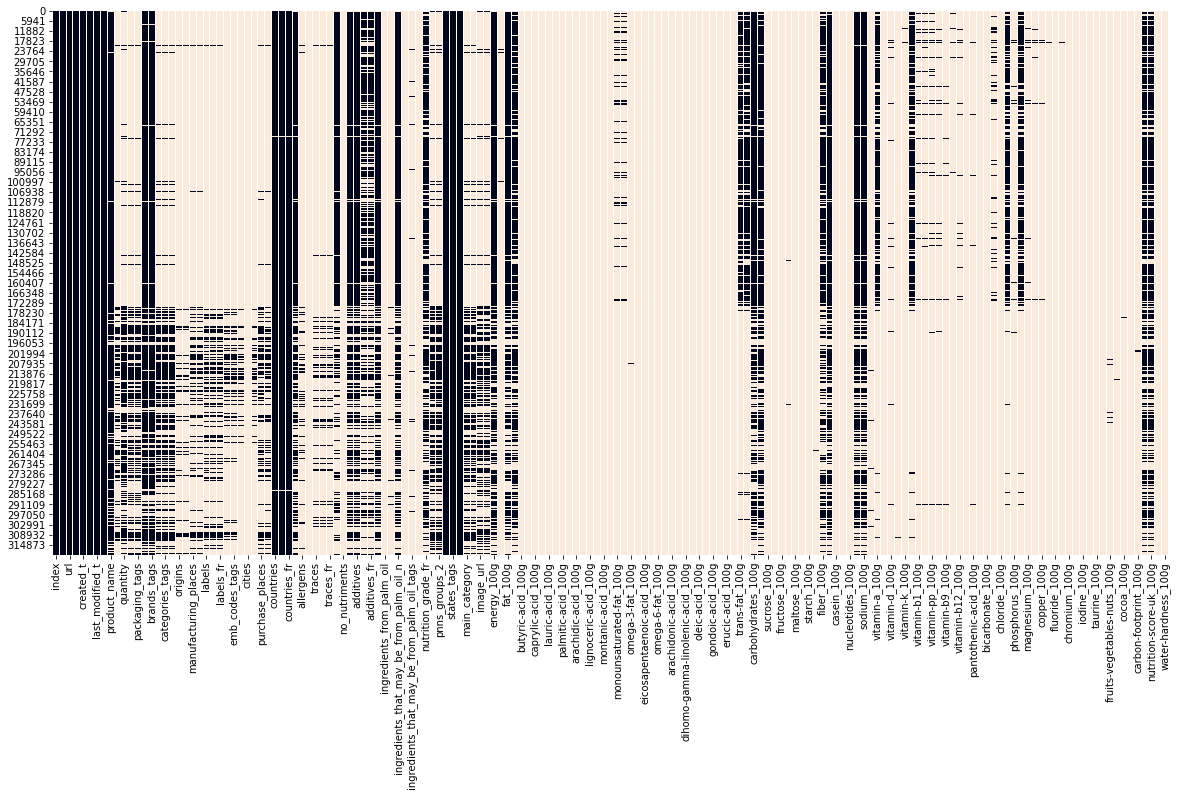

In [7]:
plt.figure(figsize=(20,10))
sns.heatmap(raw_data.isna(), cbar=False)

On a un nombre très important de variables - 163 - dont certaines ne sont presque pas renseignées.

La première étape du nettoyage de nos données va donc consister à écarter les variables qui ne nous intéressent pas. Quelles sont les variables qui nous intéressent vraiment ?

    - Quelques informations d'ordre général (created_datetime, last_modified_datetime, product_name, main_category);
    - Des informations géographiques sur le produit (origins, manufacturing places, cities, countries);
    - Les indicateurs de qualité du produit (carbon-footprint_100g, nutrition-score-fr_100g);
    - Quelques informations nutritionnelles (pnns_groups_2, additives_n, sugars_100g, proteins_100g, salt_100g, energy-ckal_100g, fat_100g, cholesterol_100g, -soluble-fiber_100g, carbohydrates).

In [8]:
#On crée une liste contenant le nom des colonnes à conserver

tosave_columns = ['created_datetime', 
                  'last_modified_datetime', 
                  'product_name',
                  'main_category',
                  'origins', 
                  'manufacturing_places', 
                  'cities', 
                  'countries',
                  'carbon-footprint_100g', 
                  'nutrition-score-fr_100g',
                  'pnns_groups_2',
                  'additives_n',
                  'sugars_100g',
                  'proteins_100g',
                  'salt_100g',
                  'energy_100g',
                  'fat_100g',
                  'cholesterol_100g',
                  'fiber_100g',
                  'carbohydrates_100g'
                 ]

In [9]:
#On crée un nouveau Dataframe en conservant les colonnes listées

data = raw_data[tosave_columns]
data.head()

,created_datetime,last_modified_datetime,product_name,main_category,origins,manufacturing_places,cities,countries,carbon-footprint_100g,nutrition-score-fr_100g,pnns_groups_2,additives_n,sugars_100g,proteins_100g,salt_100g,energy_100g,fat_100g,cholesterol_100g,fiber_100g,carbohydrates_100g
0,2016-09-17T09:17:46Z,2016-09-17T09:18:13Z,Farine de blé noir,NaN,NaN,NaN,NaN,en:FR,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2017-03-09T14:32:37Z,2017-03-09T14:32:37Z,Banana Chips Sweetened (Whole),NaN,NaN,NaN,NaN,US,NaN,14.0,NaN,0.0,14.29,3.57,0.00000,2243.0,28.57,0.018,3.6,64.29
2,2017-03-09T14:32:37Z,2017-03-09T14:32:37Z,Peanuts,NaN,NaN,NaN,NaN,US,NaN,0.0,NaN,0.0,17.86,17.86,0.63500,1941.0,17.86,0.000,7.1,60.71
3,2017-03-09T10:35:31Z,2017-03-09T10:35:31Z,Organic Salted Nut Mix,NaN,NaN,NaN,NaN,US,NaN,12.0,NaN,0.0,3.57,17.86,1.22428,2540.0,57.14,NaN,7.1,17.86
4,2017-03-09T10:34:13Z,2017-03-09T10:34:13Z,Organic Polenta,NaN,NaN,NaN,NaN,US,NaN,NaN,NaN,0.0,NaN,8.57,NaN,1552.0,1.43,NaN,5.7,77.14


Pour la colonne pnns_groups_2, certaines valeurs manquantes sont notées unknown, et pas Nan. Rectifions cela.

In [10]:
data.replace('unknown', np.nan, inplace=True)

/Users/leodray/opt/anaconda3/lib/python3.8/site-packages/pandas/core/frame.py:4524: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().replace(


Regardons désormais les valeurs manquantes de notre dataframe.

In [11]:
#On regarde le pourcentage de valeurs manquantes pour chaque colonne

(data.isna().sum()/data.shape[0]).sort_values(ascending=False)

cities                     0.999928
carbon-footprint_100g      0.999165
origins                    0.930823
manufacturing_places       0.886209
pnns_groups_2              0.775956
main_category              0.736991
cholesterol_100g           0.550802
fiber_100g                 0.373742
nutrition-score-fr_100g    0.310382
carbohydrates_100g         0.240620
fat_100g                   0.239675
sugars_100g                0.236308
additives_n                0.223938
salt_100g                  0.203453
proteins_100g              0.189699
energy_100g                0.185986
product_name               0.055373
countries                  0.000873
created_datetime           0.000028
last_modified_datetime     0.000000
dtype: float64

A partir de là, il va falloir prendre quelques décisions :

    - Supprimer les colonnes cities, carbon-footprint_100g, origins, et manufacturing_places qui ont plus de 90% de valeurs manquantes;
    - Choisir l'une ou l'autre des variables main_category et pnns_groups_2, qui correspondent toutes deux à la catégorie du produit. Nous choisirons main_category qui présente environ 5% de valeurs renseignées en plus, et qui possède une meilleure granularité que pnns_groups_2, et donc une information plus fine.
    - Regarder si le taux de valeur manquante est inférieur pour la variante anglaise du score de nutrition, et le cas échéant, remmplacer la variable nutrition-score-fr_100g.

In [12]:
#On supprime les colonnes qui contiennent trop de valeurs manquantes

data.drop(['cities', 'carbon-footprint_100g', 'origins', 'manufacturing_places', 'pnns_groups_2'], axis=1, inplace=True)

/Users/leodray/opt/anaconda3/lib/python3.8/site-packages/pandas/core/frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [13]:
#On regarde le taux de valeurs manquantes pour 'nutrition-score-uk_100g'

raw_data['nutrition-score-uk_100g'].isna().sum()/raw_data.shape[0]

0.31038245233374484

On a le même taux de valeurs manquantés avec 'nutrition-score-fr_100g'. On garde donc notre Dataframe en l'état.

In [14]:
data.head()

,created_datetime,last_modified_datetime,product_name,main_category,countries,nutrition-score-fr_100g,additives_n,sugars_100g,proteins_100g,salt_100g,energy_100g,fat_100g,cholesterol_100g,fiber_100g,carbohydrates_100g
0,2016-09-17T09:17:46Z,2016-09-17T09:18:13Z,Farine de blé noir,NaN,en:FR,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2017-03-09T14:32:37Z,2017-03-09T14:32:37Z,Banana Chips Sweetened (Whole),NaN,US,14.0,0.0,14.29,3.57,0.00000,2243.0,28.57,0.018,3.6,64.29
2,2017-03-09T14:32:37Z,2017-03-09T14:32:37Z,Peanuts,NaN,US,0.0,0.0,17.86,17.86,0.63500,1941.0,17.86,0.000,7.1,60.71
3,2017-03-09T10:35:31Z,2017-03-09T10:35:31Z,Organic Salted Nut Mix,NaN,US,12.0,0.0,3.57,17.86,1.22428,2540.0,57.14,NaN,7.1,17.86
4,2017-03-09T10:34:13Z,2017-03-09T10:34:13Z,Organic Polenta,NaN,US,NaN,0.0,NaN,8.57,NaN,1552.0,1.43,NaN,5.7,77.14


Commençons par traiter la question des outliers, c'est-à-dire des éventuelles valeurs aberrantes qu'on peut rencontrer dans le dataset, pour les variables numériques. Nous allons commencer par utiliser les percentiles pour zoomer sur les valeurs extrêmes de nos données. Puis nous généraliserons pour créer une fonction permettant de supprimer les outliers.

In [15]:
numerical_col = ['additives_n',
                 'sugars_100g',
                 'proteins_100g',
                 'salt_100g',
                 'energy_100g',
                 'fat_100g',
                 'cholesterol_100g',
                 'fiber_100g',
                 'carbohydrates_100g'
                ]
                 

In [16]:
threshold_dic = {}

for col in numerical_col:
    min_threshold, max_threshold = data[col].quantile([0.001, 0.999])
    threshold_dic[col] = (min_threshold, max_threshold)

In [17]:
for k in threshold_dic:
    print(f'{k :-<50}{threshold_dic[k]}')

additives_n---------------------------------------(0.0, 18.0)
sugars_100g---------------------------------------(0.0, 100.0)
proteins_100g-------------------------------------(0.0, 64.29)
salt_100g-----------------------------------------(0.0, 99.90582)
energy_100g---------------------------------------(0.0, 3887.0)
fat_100g------------------------------------------(0.0, 100.0)
cholesterol_100g----------------------------------(0.0, 0.373)
fiber_100g----------------------------------------(0.0, 44.4)
carbohydrates_100g--------------------------------(0.0, 100.0)


On traite la colonne nutrition-score-fr_100g à part.

In [18]:
data['nutrition-score-fr_100g'].quantile([0.001, 0.999])

0.001   -10.0
0.999    32.0
Name: nutrition-score-fr_100g, dtype: float64

En consultant les différents seuils des valeurs pour chaque variable, on voit déjà les deux problèmes auxquels on va faire face : 
- Des valeurs supérieures à 100g pour les colonnes salt et sugar. Attention, pour certains produits, il est logique d'avoir une quantité de sel ou de sucre de 100g : respectivement pour le sel, et pour le sucre ! Ce n'est pas une valeur aberrante, même si elle est atypique. En revanche, on ne peut pas avoir 104g de sel pour 100g de produit. De même, les produits les plus énergétiques (huile de colza, huile d'avocat), font 900 kcal pour 100g. 
     
- Des valeurs négatives pour la colonne nutrition-score-fr_100g qui amènent deux questions : Est-il possible d'avoir un score de nutrition négatif d'après la méthode de calcul employée ? Sinon, l'ajout de ces valeurs était-elle préalable à notre imputing ou a-t-on ajouté ces valeurs avec le KNN_imputing ?
     
     

En fait, les produits ayant des valeurs négatives existent (entre 0 et - 15). Ceux sont même ceux qui ont la meilleure note nutri score (A). Voici l'indice de notation : 

    Nutri-Score A : -15 à -1
    Nutri-Score B : 0 à 2
    Nutri-Score C : 3 à 10
    Nutri-Score D : 11 à 18
    Nutri-Score E : 19 à 40 
    
Il nous reste dont juste à traiter les valeurs aberrantes des variables numériques. Jetons un oeil à quelques valeurs.

In [19]:
k=0
for i, e in enumerate(data['salt_100g']):
    if e > 100:
        print(data.iloc[i])
        k+=1
    if k==3:
        break

created_datetime             2017-03-09T20:14:30Z
last_modified_datetime       2017-03-09T20:14:30Z
product_name               Mediterranean Sea Salt
main_category                                 NaN
countries                                      US
nutrition-score-fr_100g                       NaN
additives_n                                   0.0
sugars_100g                                   NaN
proteins_100g                                 0.0
salt_100g                               105.83418
energy_100g                                   0.0
fat_100g                                      0.0
cholesterol_100g                              NaN
fiber_100g                                    NaN
carbohydrates_100g                            0.0
Name: 501, dtype: object
created_datetime           2017-03-10T09:51:36Z
last_modified_datetime     2017-03-10T09:51:36Z
product_name                Dill Pickle Cashews
main_category                               NaN
countries                        

In [20]:
k=0
for i, e in enumerate(data['energy_100g']):
    if e > 900:
        print(data.iloc[i])
        print(i)
        k+=1
    if k==3:
        break

created_datetime                     2017-03-09T14:32:37Z
last_modified_datetime               2017-03-09T14:32:37Z
product_name               Banana Chips Sweetened (Whole)
main_category                                         NaN
countries                                              US
nutrition-score-fr_100g                              14.0
additives_n                                           0.0
sugars_100g                                         14.29
proteins_100g                                        3.57
salt_100g                                             0.0
energy_100g                                        2243.0
fat_100g                                            28.57
cholesterol_100g                                    0.018
fiber_100g                                            3.6
carbohydrates_100g                                  64.29
Name: 1, dtype: object
1
created_datetime           2017-03-09T14:32:37Z
last_modified_datetime     2017-03-09T14:32:37Z
product_n

Ici, on a différentes valeurs bien au-delà de 100g pour salt_100g, et au-delà de 900 pour energy_100g. On peut s'interroger sur les causes de ces valeurs incohérentes : fautes de frappes lors de la collecte des données ? 

In [21]:
for col in numerical_col:
    if col != 'energy_100g':
        print(f'{col :-<50}{len([e for e in data[col] if e > 100 or e < 0])}')
    else:
        print(f'{col :-<50}{len([e for e in data[col] if e > 900 or e < 0])}')

additives_n---------------------------------------0
sugars_100g---------------------------------------19
proteins_100g-------------------------------------4
salt_100g-----------------------------------------158
energy_100g---------------------------------------148055
fat_100g------------------------------------------4
cholesterol_100g----------------------------------0
fiber_100g----------------------------------------5
carbohydrates_100g--------------------------------19


Le nombre d'individus concernés est très faible par rapport à la taille de notre jeu de données. Pour résoudre ce problème et généraliser, créons une fonction pour retirer les individus présentant des valeurs aberrantes de notre dataset.

In [22]:
def outlier_cleaner(data, numerical_col):
    """Fonction permettant de retirer les outliers de notre jeu de données"""

    for col in numerical_col:
        if col != 'energy_100g':
            data.drop(data[data[col] > 100].index, inplace=True)
            data.drop(data[data[col] < 0].index, inplace=True)
        else:
            data.drop(data[data[col] > 900].index, inplace=True)
            data.drop(data[data[col] < 0].index, inplace=True)

In [23]:
outlier_cleaner(data, numerical_col)

/Users/leodray/opt/anaconda3/lib/python3.8/site-packages/pandas/core/frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(
/Users/leodray/opt/anaconda3/lib/python3.8/site-packages/pandas/core/frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(
/Users/leodray/opt/anaconda3/lib/python3.8/site-packages/pandas/core/frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return 

On vérifie qu'il n'y a plus de valeurs aberrantes.

In [24]:
for col in numerical_col:
    if col != 'energy_100g':
        print(f'{col :-<50}{len([e for e in data[col] if e > 100 or e < 0])}')
    else:
        print(f'{col :-<50}{len([e for e in data[col] if e > 900 or e < 0])}')

additives_n---------------------------------------0
sugars_100g---------------------------------------0
proteins_100g-------------------------------------0
salt_100g-----------------------------------------0
energy_100g---------------------------------------0
fat_100g------------------------------------------0
cholesterol_100g----------------------------------0
fiber_100g----------------------------------------0
carbohydrates_100g--------------------------------0


On peut désormais s'attaquer à la question des valeurs manquantes. 

In [25]:
(data.isna().sum()/data.shape[0]).sort_values(ascending=False)

main_category              0.707105
cholesterol_100g           0.686187
fiber_100g                 0.533018
nutrition-score-fr_100g    0.486504
sugars_100g                0.396497
carbohydrates_100g         0.386565
fat_100g                   0.385551
salt_100g                  0.359127
proteins_100g              0.347741
energy_100g                0.345678
additives_n                0.327291
product_name               0.091497
countries                  0.001385
created_datetime           0.000046
last_modified_datetime     0.000000
dtype: float64

In [26]:
data.dtypes

created_datetime            object
last_modified_datetime      object
product_name                object
main_category               object
countries                   object
nutrition-score-fr_100g    float64
additives_n                float64
sugars_100g                float64
proteins_100g              float64
salt_100g                  float64
energy_100g                float64
fat_100g                   float64
cholesterol_100g           float64
fiber_100g                 float64
carbohydrates_100g         float64
dtype: object

In [27]:
data.shape

(172574, 15)

On va procéder différemment selon les cas :

   - On retire tous les individus qui contiennent des valeurs manquantes de product_name, car on ne travaille que sur des produits dont on connaît au moins le nom et qu'il y a très peu de valeurs manquantes pour ces variables;
   - On retir les individus qui contiennet des valeurs manquantes pour les variables relatives à des dates, car elles seront dur à remplacer et cela concerne peu de cas;
   - Pour les variables numériques relatives à la composition du produit, on remplace les variables avec une stratégie d'imputing simple;
   - Pour le score de nutrition et pour la catégorie principale, qui sont des variables cruciales, on utilise un algorithme de KNN pour remplacer les valeurs à partir de leurs plus proches voisins.

In [28]:
#On retire les individus de data pour lesquels les variables product_name ou countries ne sont pas renseignées

data = data.dropna(subset=['product_name', 'countries', 'created_datetime', 'last_modified_datetime'])

In [29]:
data.shape #On a perdu moins de 5% des données

(156586, 15)

In [30]:
data[['product_name', 'countries']].isna().sum() #Toutes les valeurs manquantes ont bien été retirées

product_name    0
countries       0
dtype: int64

/Users/leodray/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/leodray/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/leodray/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with simil

<Figure size 432x288 with 0 Axes>

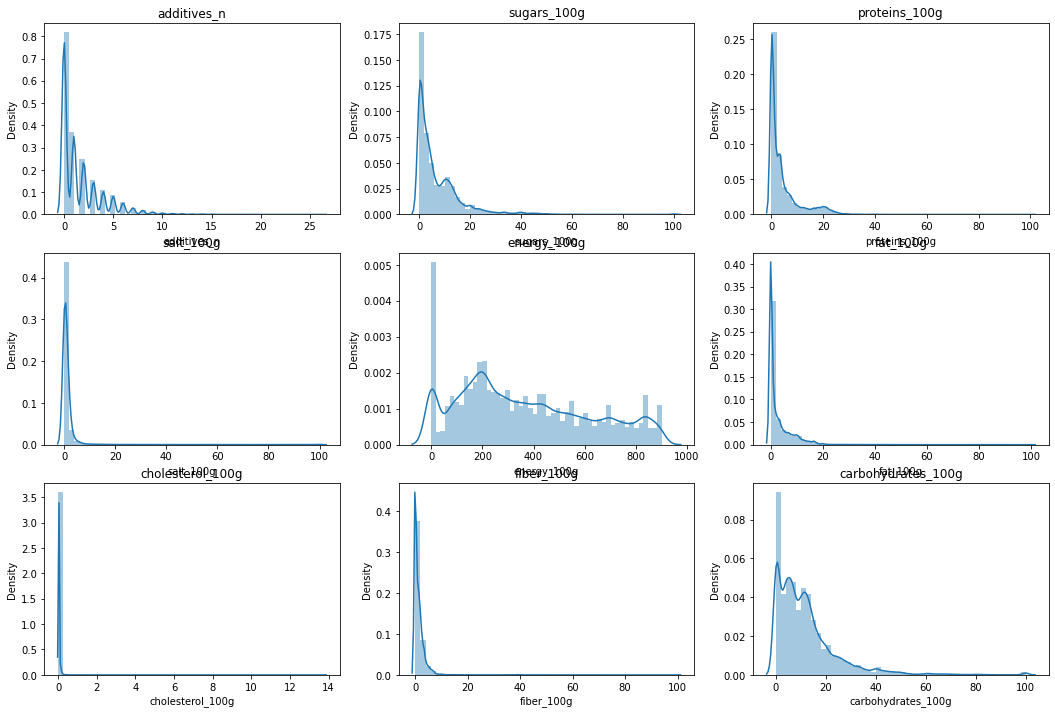

In [31]:
plt.figure()
fig, axes = plt.subplots(3, 3, figsize=(18,12))
for i, e in enumerate(numerical_col):
    sns.distplot(data[e], ax=axes[i//3, i%3]).set_title(f'{e}')

On veut créer notre imputer avec une stratégie fondée sur la médiane ou la moyenne.
Pour choisir, on va regarder la distribution de nos variables numériques.

<Figure size 432x288 with 0 Axes>

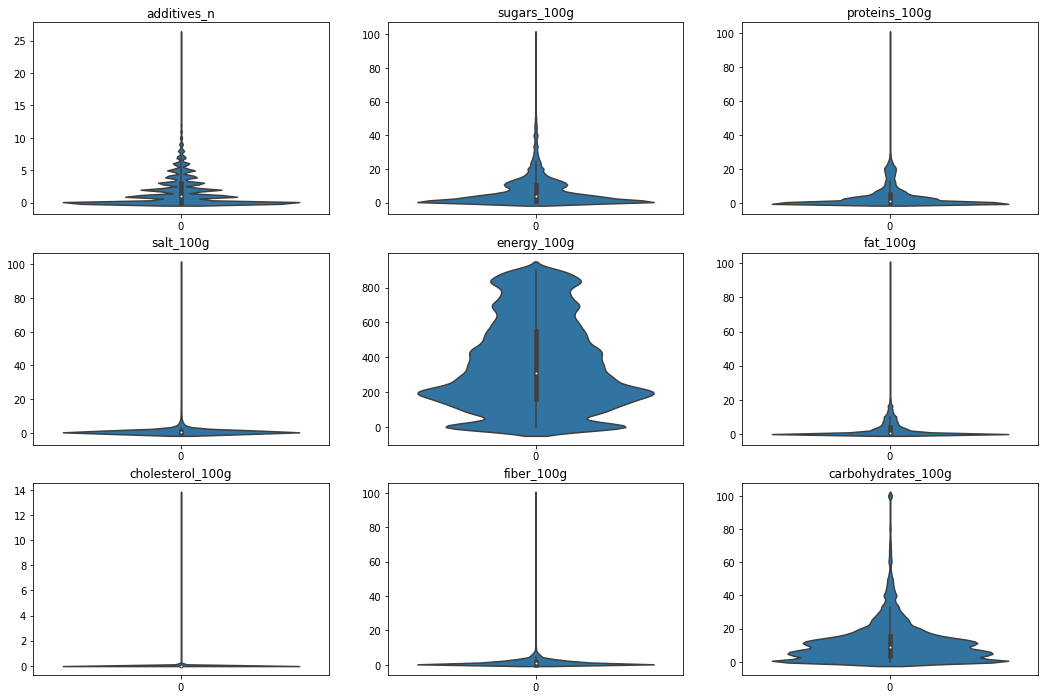

In [32]:
plt.figure()
fig, axes = plt.subplots(3, 3, figsize=(18,12))
for i, e in enumerate(numerical_col):
    sns.violinplot(ax=axes[i//3, i%3], data=data[e]).set_title(f'{e}')

<Figure size 432x288 with 0 Axes>

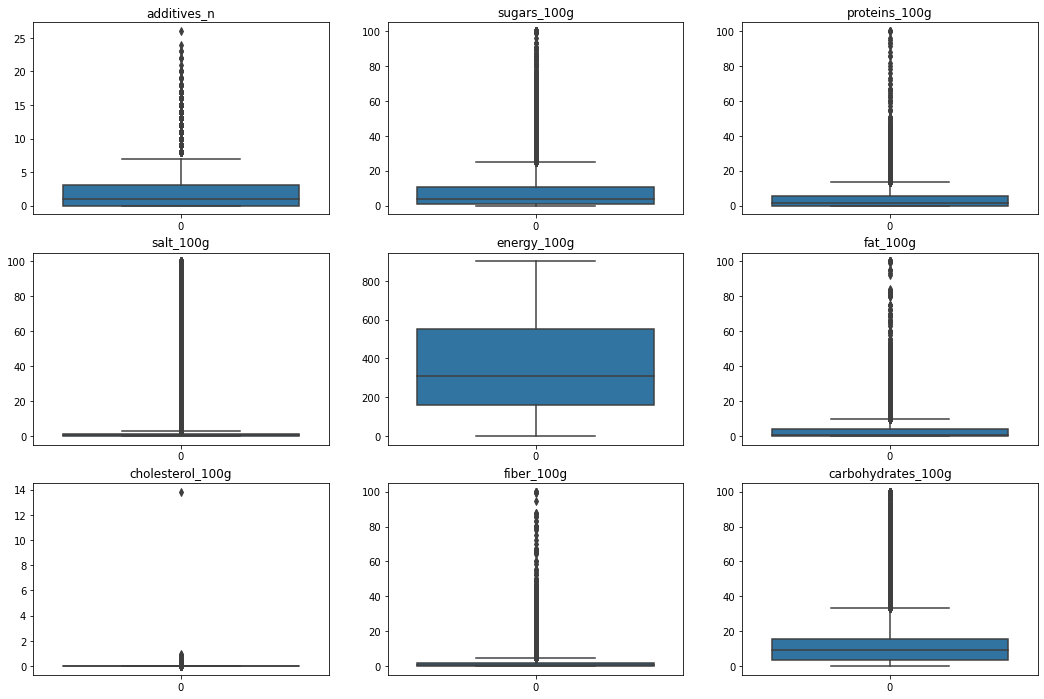

In [33]:
plt.figure()
fig, axes = plt.subplots(3, 3, figsize=(18,12))
for i, e in enumerate(numerical_col):
    sns.boxplot(ax=axes[i//3, i%3], data=data[e]).set_title(f'{e}')

La distribution n'est pas symétrique et ne suit pas une distribution normale. 
Il vaut donc mieux utiliser la médiane, qui est un indicateur plus robuste, comme stratégie d'imputing.

In [34]:
#On importe le ColumnTransformer ainsi que le SimpleImputer de sklearn

from sklearn.compose import make_column_transformer
from sklearn.impute import SimpleImputer

#On crée un ColumnTransformer pour les variables concernées

#On utilise un SimpleImputer avec la stratégie médiane
#On choisit les variables à impute
#On utilise le paramètre remainder pour conserver les autres colonnes

col_transformer = make_column_transformer((SimpleImputer(missing_values=np.nan, strategy='median'), numerical_col), remainder='passthrough')


In [35]:
col_transformer.fit_transform(data)

array([[1.0, 3.6, 1.64, ..., nan, 'en:FR', nan],
       [0.0, 3.6, 1.64, ..., nan, 'US', nan],
       [1.0, 3.6, 1.64, ..., 'fr:filet-de-boeuf', 'France', nan],
       ...,
       [0.0, 0.0, 0.0, ..., nan, 'US', 0.0],
       [1.0, 3.6, 1.64, ..., 'en:chips-and-fries', 'China', nan],
       [1.0, 3.6, 1.64, ..., nan, 'en:FR', nan]], dtype=object)

In [36]:
data.isna().sum() #Il semblerait que la transformation ne fonctionne pas 

created_datetime                0
last_modified_datetime          0
product_name                    0
main_category              106874
countries                       0
nutrition-score-fr_100g     69060
additives_n                 41473
sugars_100g                 53726
proteins_100g               45422
salt_100g                   47239
energy_100g                 45062
fat_100g                    51935
cholesterol_100g           102476
fiber_100g                  76955
carbohydrates_100g          52115
dtype: int64

Le problème vient sûrement du fait que les missing values ne sont pas des np.nan. Pour le moment, on va utiliser une solution plus simple.

In [37]:
for col in numerical_col:
    data[col].fillna(data[col].median(), inplace=True)

In [38]:
data.head()

,created_datetime,last_modified_datetime,product_name,main_category,countries,nutrition-score-fr_100g,additives_n,sugars_100g,proteins_100g,salt_100g,energy_100g,fat_100g,cholesterol_100g,fiber_100g,carbohydrates_100g
0,2016-09-17T09:17:46Z,2016-09-17T09:18:13Z,Farine de blé noir,NaN,en:FR,NaN,1.0,3.60,1.64,0.32500,310.0,0.5,0.0,0.8,9.00
25,2017-03-09T10:35:13Z,2017-03-09T10:35:13Z,Real Salt Granular,NaN,US,NaN,0.0,3.60,1.64,96.15678,310.0,0.5,0.0,0.8,9.00
46,2015-06-17T08:45:04Z,2015-06-17T10:11:54Z,Filet de bœuf,fr:filet-de-boeuf,France,NaN,1.0,3.60,1.64,0.32500,310.0,0.5,0.0,0.8,9.00
52,2017-03-09T10:35:30Z,2017-03-09T10:35:30Z,Organic Small Red Chili Beans,NaN,US,NaN,0.0,2.78,22.22,0.17526,699.0,0.5,0.0,44.4,63.89
71,2017-03-09T10:35:09Z,2017-03-09T10:35:09Z,Fine Sea Salt,NaN,US,NaN,0.0,3.60,1.64,99.90582,310.0,0.5,0.0,0.8,9.00


In [39]:
data.isna().sum()

created_datetime                0
last_modified_datetime          0
product_name                    0
main_category              106874
countries                       0
nutrition-score-fr_100g     69060
additives_n                     0
sugars_100g                     0
proteins_100g                   0
salt_100g                       0
energy_100g                     0
fat_100g                        0
cholesterol_100g                0
fiber_100g                      0
carbohydrates_100g              0
dtype: int64

Il nous reste à remplacer les valeurs manquantes pour les variables main_category et nutrition-score-fr_100g. On va utiliser un algorithme de KNN pour remplacer les valeurs à partir de leur plus proche voisin. Avant de faire ça, il nous faut encoder la variable catégorielle main_category.

In [40]:
#On importe le KNNImputer et l'Ordinal encoder de sklearn 

from sklearn.impute import KNNImputer
from sklearn.preprocessing import OrdinalEncoder

In [41]:
encoder = OrdinalEncoder()

def encode(data):
    '''fonction permettant d'encoder les valeurs non nulles'''
    #on retient les valeurs non nulles
    nonulls = np.array(data.dropna())
    #on reshape les données pour l'encodage
    impute_reshape = nonulls.reshape(-1,1)
    #on encode les données
    impute_ordinal = encoder.fit_transform(impute_reshape)
    #Assign back encoded values to non-null values
    data.loc[data.notnull()] = np.squeeze(impute_ordinal)
    return data


#On encode la variable main_category
encode(data['main_category'])

0            NaN
25           NaN
46        1572.0
52           NaN
71           NaN
           ...  
320765     964.0
320767       NaN
320768       NaN
320769     384.0
320770       NaN
Name: main_category, Length: 156586, dtype: object

In [42]:
data.head()

,created_datetime,last_modified_datetime,product_name,main_category,countries,nutrition-score-fr_100g,additives_n,sugars_100g,proteins_100g,salt_100g,energy_100g,fat_100g,cholesterol_100g,fiber_100g,carbohydrates_100g
0,2016-09-17T09:17:46Z,2016-09-17T09:18:13Z,Farine de blé noir,NaN,en:FR,NaN,1.0,3.60,1.64,0.32500,310.0,0.5,0.0,0.8,9.00
25,2017-03-09T10:35:13Z,2017-03-09T10:35:13Z,Real Salt Granular,NaN,US,NaN,0.0,3.60,1.64,96.15678,310.0,0.5,0.0,0.8,9.00
46,2015-06-17T08:45:04Z,2015-06-17T10:11:54Z,Filet de bœuf,1572.0,France,NaN,1.0,3.60,1.64,0.32500,310.0,0.5,0.0,0.8,9.00
52,2017-03-09T10:35:30Z,2017-03-09T10:35:30Z,Organic Small Red Chili Beans,NaN,US,NaN,0.0,2.78,22.22,0.17526,699.0,0.5,0.0,44.4,63.89
71,2017-03-09T10:35:09Z,2017-03-09T10:35:09Z,Fine Sea Salt,NaN,US,NaN,0.0,3.60,1.64,99.90582,310.0,0.5,0.0,0.8,9.00


Les opérations du KNN_imputer sur l'ensemble des données risquent d'être très longues. On va donc d'abord travailler sur un petit échantillons du data_set pour vérifier que tout est opérationnel, avant de lancer les calculs. On va aussi pouvoir tester différents hyperparamètres pour optimiser notre modèle.

In [43]:
KNN_imputer = KNNImputer(n_neighbors=2250) #Paramètre sur lequel on peut jouer --> Après différents test, on choisit n=100
KNN_col = ['nutrition-score-fr_100g', 'main_category']

KNN_transformer = make_column_transformer((KNN_imputer, KNN_col), remainder='passthrough', verbose=True)

In [44]:
test_data = data[0:1000]

In [45]:
transformed_array = KNN_transformer.fit_transform(test_data)

[ColumnTransformer] .... (1 of 2) Processing knnimputer, total=   0.0s
[ColumnTransformer] ..... (2 of 2) Processing remainder, total=   0.0s


In [46]:
#Le KNN_imputer va replacer les colonnes transformées au début du DataFrame
#On construit donc une nouvelle liste des noms de colonnes

reshaped_data_col = ['nutrition-score-fr_100g',
                     'main_category',
                     'created_datetime',
                     'last_modified_datetime',
                     'product_name',
                     'countries',
                     'additives_n',
                     'sugars_100g',
                     'proteins_100g',
                     'salt_100g',
                     'energy_100g',
                     'fat_100g',
                     'cholesterol_100g',
                     'fiber_100g',
                     'carbohydrates_100g'
                    ]

transformed_data = pd.DataFrame(transformed_array, columns = reshaped_data_col)

In [47]:
transformed_data.head()

,nutrition-score-fr_100g,main_category,created_datetime,last_modified_datetime,product_name,countries,additives_n,sugars_100g,proteins_100g,salt_100g,energy_100g,fat_100g,cholesterol_100g,fiber_100g,carbohydrates_100g
0,2.991087,731.102941,2016-09-17T09:17:46Z,2016-09-17T09:18:13Z,Farine de blé noir,en:FR,1.0,3.6,1.64,0.325,310.0,0.5,0.0,0.8,9.0
1,2.991087,731.102941,2017-03-09T10:35:13Z,2017-03-09T10:35:13Z,Real Salt Granular,US,0.0,3.6,1.64,96.15678,310.0,0.5,0.0,0.8,9.0
2,2.991087,1572.0,2015-06-17T08:45:04Z,2015-06-17T10:11:54Z,Filet de bœuf,France,1.0,3.6,1.64,0.325,310.0,0.5,0.0,0.8,9.0
3,2.991087,731.102941,2017-03-09T10:35:30Z,2017-03-09T10:35:30Z,Organic Small Red Chili Beans,US,0.0,2.78,22.22,0.17526,699.0,0.5,0.0,44.4,63.89
4,2.991087,731.102941,2017-03-09T10:35:09Z,2017-03-09T10:35:09Z,Fine Sea Salt,US,0.0,3.6,1.64,99.90582,310.0,0.5,0.0,0.8,9.0


In [48]:
transformed_data.isna().sum()

nutrition-score-fr_100g    0
main_category              0
created_datetime           0
last_modified_datetime     0
product_name               0
countries                  0
additives_n                0
sugars_100g                0
proteins_100g              0
salt_100g                  0
energy_100g                0
fat_100g                   0
cholesterol_100g           0
fiber_100g                 0
carbohydrates_100g         0
dtype: int64

In [49]:
transformed_data['nutrition-score-fr_100g'].value_counts()

 2.991087     439
 1.000000      70
 0.000000      56
 2.000000      47
 5.000000      39
-1.000000      39
 6.000000      33
 3.000000      32
-2.000000      31
-3.000000      28
-4.000000      27
 12.000000     25
 4.000000      25
 13.000000     19
-5.000000      18
 9.000000      12
 10.000000      9
 7.000000       8
 11.000000      8
 8.000000       7
 15.000000      6
 14.000000      6
 19.000000      4
 18.000000      3
-6.000000       2
 17.000000      2
 16.000000      2
 20.000000      1
-8.000000       1
-7.000000       1
Name: nutrition-score-fr_100g, dtype: int64

In [50]:
transformed_data['main_category'].value_counts()

731.102941     932
533.000000       6
576.000000       5
309.000000       3
396.000000       3
782.000000       3
662.000000       3
430.000000       3
867.000000       2
616.000000       2
1012.000000      2
1017.000000      2
288.000000       2
1149.000000      2
254.000000       2
783.000000       2
781.000000       2
984.000000       1
754.000000       1
880.000000       1
621.000000       1
361.000000       1
2268.000000      1
858.000000       1
345.000000       1
384.000000       1
340.000000       1
972.000000       1
1097.000000      1
1988.000000      1
1029.000000      1
959.000000       1
316.000000       1
1077.000000      1
1067.000000      1
810.000000       1
1830.000000      1
1572.000000      1
673.000000       1
287.000000       1
894.000000       1
Name: main_category, dtype: int64

On a plus de données manquantes sur le dataset, mais les données des colonnes nutrition-score-fr_100g et main_category ont été souvent remplacées par la même valeur. Il faut revoir notre modèle avant de généraliser. Peut-être que c'est dû au faible nombre de données sur notre échantillon. Augmentons la taille de l'échantillon pour voir si on obtient de meilleurs résultats.

In [51]:
test_data_v2 = data[0:10000]

In [52]:
transformed_array_v2 = KNN_transformer.fit_transform(test_data_v2)

[ColumnTransformer] .... (1 of 2) Processing knnimputer, total=   3.8s
[ColumnTransformer] ..... (2 of 2) Processing remainder, total=   0.0s


In [53]:
transformed_data_v2 = pd.DataFrame(transformed_array_v2, columns = reshaped_data_col)

In [54]:
transformed_data_v2['nutrition-score-fr_100g'].value_counts() #On remarque qu'il y a des valeurs négatives

 2.526571     3045
 0.000000      913
 1.000000      796
 2.000000      732
-1.000000      591
 3.000000      485
-3.000000      367
-2.000000      359
 4.000000      289
-4.000000      271
 5.000000      242
 12.000000     202
 6.000000      185
 11.000000     173
 2.781778      162
 13.000000     134
-5.000000      125
 10.000000     119
 7.000000      106
 15.000000      96
-6.000000       82
 9.000000       82
 14.000000      81
 8.000000       76
 16.000000      62
-8.000000       46
 19.000000      44
-7.000000       34
 17.000000      32
 18.000000      28
 20.000000      20
-9.000000       11
-10.000000       4
 22.000000       3
 21.000000       2
 23.000000       1
Name: nutrition-score-fr_100g, dtype: int64

In [55]:
transformed_data_v2['main_category'].value_counts()

672.954545     9692
254.000000       33
662.000000       28
316.000000       24
1012.000000      11
               ... 
589.000000        1
244.000000        1
1572.000000       1
263.000000        1
2044.000000       1
Name: main_category, Length: 113, dtype: int64

Les performances ont l'air meilleures - les valeurs remplacées sont plus variées et plus dispersées. On a encore une concentration sur la première valeur, mais avec le très grand nombre de données du dataset, le modèle devrait obtenir de bonnes performances. On peut donc généraliser notre modèle.

In [56]:
array = KNN_transformer.fit_transform(data)

[ColumnTransformer] .... (1 of 2) Processing knnimputer, total=21.9min
[ColumnTransformer] ..... (2 of 2) Processing remainder, total=   0.0s


In [57]:
clean_data = pd.DataFrame(array, columns = reshaped_data_col)

In [58]:
clean_data.head()

,nutrition-score-fr_100g,main_category,created_datetime,last_modified_datetime,product_name,countries,additives_n,sugars_100g,proteins_100g,salt_100g,energy_100g,fat_100g,cholesterol_100g,fiber_100g,carbohydrates_100g
0,2.792462,714.123491,2016-09-17T09:17:46Z,2016-09-17T09:18:13Z,Farine de blé noir,en:FR,1.0,3.6,1.64,0.325,310.0,0.5,0.0,0.8,9.0
1,2.792462,714.123491,2017-03-09T10:35:13Z,2017-03-09T10:35:13Z,Real Salt Granular,US,0.0,3.6,1.64,96.15678,310.0,0.5,0.0,0.8,9.0
2,2.104444,1572.0,2015-06-17T08:45:04Z,2015-06-17T10:11:54Z,Filet de bœuf,France,1.0,3.6,1.64,0.325,310.0,0.5,0.0,0.8,9.0
3,2.792462,714.123491,2017-03-09T10:35:30Z,2017-03-09T10:35:30Z,Organic Small Red Chili Beans,US,0.0,2.78,22.22,0.17526,699.0,0.5,0.0,44.4,63.89
4,2.792462,714.123491,2017-03-09T10:35:09Z,2017-03-09T10:35:09Z,Fine Sea Salt,US,0.0,3.6,1.64,99.90582,310.0,0.5,0.0,0.8,9.0


Il ne nous reste plus qu'à décoder les variables de la colonne main_category.

In [59]:
#Décoder les données de main_category

def decode(data, col):
    """Fonction permettant de décoder les valeurs encodées"""
    #On transforme la colonne spécifiée en np.array
    encoded_arr = np.array(data[col])
    #On reshape l'array
    encoded_arr.reshape(-1, 1)
    #On effectue la transformation inverse
    decoded_data = encoder.inverse_transform(encoded_arr.reshape(-1,1))
    #On supprime l'ancienne version de la colonne spécifiée
    data.drop(col, axis=1, inplace=True)
    #On crée une nouvelle colonne avec les données décodées
    data[col] = decoded_data


In [60]:
decode(clean_data, 'main_category')

In [61]:
clean_data.head()

,nutrition-score-fr_100g,created_datetime,last_modified_datetime,product_name,countries,additives_n,sugars_100g,proteins_100g,salt_100g,energy_100g,fat_100g,cholesterol_100g,fiber_100g,carbohydrates_100g,main_category
0,2.792462,2016-09-17T09:17:46Z,2016-09-17T09:18:13Z,Farine de blé noir,en:FR,1.0,3.6,1.64,0.325,310.0,0.5,0.0,0.8,9.0,en:juice-beverage
1,2.792462,2017-03-09T10:35:13Z,2017-03-09T10:35:13Z,Real Salt Granular,US,0.0,3.6,1.64,96.15678,310.0,0.5,0.0,0.8,9.0,en:juice-beverage
2,2.104444,2015-06-17T08:45:04Z,2015-06-17T10:11:54Z,Filet de bœuf,France,1.0,3.6,1.64,0.325,310.0,0.5,0.0,0.8,9.0,fr:filet-de-boeuf
3,2.792462,2017-03-09T10:35:30Z,2017-03-09T10:35:30Z,Organic Small Red Chili Beans,US,0.0,2.78,22.22,0.17526,699.0,0.5,0.0,44.4,63.89,en:juice-beverage
4,2.792462,2017-03-09T10:35:09Z,2017-03-09T10:35:09Z,Fine Sea Salt,US,0.0,3.6,1.64,99.90582,310.0,0.5,0.0,0.8,9.0,en:juice-beverage


In [62]:
clean_data['nutrition-score-fr_100g'].value_counts()

 2.792462    45913
 0.000000     9736
 1.000000     9440
 2.000000     8934
-1.000000     6493
             ...  
 3.418667        1
 2.145778        1
 5.898667        1
 2.073778        1
-1.699556        1
Name: nutrition-score-fr_100g, Length: 1100, dtype: int64

On va finir par faire un peu d'ingénieurie pour faciliter la manipulation, l'analyse statistique et la visualisation de nos données :

- Les valeurs des colonnes created_datetime et last_modified_datetime sont des chaînes de caractère, difficilement manipulables. On met ces valeurs au format pd.datetime ;
- On va retirer la capsule renseignant la langue dans la variable main_category (ex: 'en:') à l'aide d'expressions régulières ;
- Le format d'entrée des variables countries et main_category n'est pas très stable (alternance entre abréviation/nom de pays, alternance du signe de séparation entre les différents pays, avec :, virgule ou virgule avec espace). Il y a aussi des problèmes de polyphonie, puisque les variables sont renseignées en différentes langues On va essayer de standardiser la colonne countries en séparant les noms de pays à l'aide d'expressions régulières, en traduisant les noms de pays à l'aide de googletrans et en standardisant les notations des pays pour obtenir des listes de pays plus facilement manipulables.

In [63]:
#On calcule le nombre de chiffres dans la date
def number_digit(str):

    flag_n = 0

    for i in str:  
        if i.isdigit():
            flag_n += 1
            
    return flag_n

In [64]:
#On gère les exceptions en retirant les valeurs qui ne peuvent pas être converties au format datetime
i = 0
while i < clean_data.shape[0]:
    if number_digit(clean_data['created_datetime'].iloc[i]) < 8:
        clean_data = clean_data.drop(clean_data.index[i])
        clean_data = clean_data.reset_index(drop=True)
    else:
        i += 1

In [65]:
i = 0
while i < clean_data.shape[0]:
    if number_digit(clean_data['last_modified_datetime'].iloc[i]) < 8:
        clean_data = clean_data.drop(clean_data.index[i])
        clean_data = clean_data.reset_index(drop=True)
    else:
        i += 1

In [66]:
clean_data['created_datetime'] = pd.to_datetime(clean_data['created_datetime'])
clean_data['last_modified_datetime'] = pd.to_datetime(clean_data['last_modified_datetime'])

In [67]:
clean_data.head()

,nutrition-score-fr_100g,created_datetime,last_modified_datetime,product_name,countries,additives_n,sugars_100g,proteins_100g,salt_100g,energy_100g,fat_100g,cholesterol_100g,fiber_100g,carbohydrates_100g,main_category
0,2.792462,2016-09-17 09:17:46+00:00,2016-09-17 09:18:13+00:00,Farine de blé noir,en:FR,1.0,3.6,1.64,0.325,310.0,0.5,0.0,0.8,9.0,en:juice-beverage
1,2.792462,2017-03-09 10:35:13+00:00,2017-03-09 10:35:13+00:00,Real Salt Granular,US,0.0,3.6,1.64,96.15678,310.0,0.5,0.0,0.8,9.0,en:juice-beverage
2,2.104444,2015-06-17 08:45:04+00:00,2015-06-17 10:11:54+00:00,Filet de bœuf,France,1.0,3.6,1.64,0.325,310.0,0.5,0.0,0.8,9.0,fr:filet-de-boeuf
3,2.792462,2017-03-09 10:35:30+00:00,2017-03-09 10:35:30+00:00,Organic Small Red Chili Beans,US,0.0,2.78,22.22,0.17526,699.0,0.5,0.0,44.4,63.89,en:juice-beverage
4,2.792462,2017-03-09 10:35:09+00:00,2017-03-09 10:35:09+00:00,Fine Sea Salt,US,0.0,3.6,1.64,99.90582,310.0,0.5,0.0,0.8,9.0,en:juice-beverage


In [68]:
def category_cleaner(main_category):
    
    if ':' in main_category:
        clean_category = main_category.split(':')[1]
        return clean_category
    else:
        return main_category

In [69]:
for i, e in enumerate(clean_data['main_category']):
    if type(e) == float:
        print(i, e)

In [70]:
clean_data['main_category'] = clean_data['main_category'].map(category_cleaner)

In [71]:
clean_data.head()

,nutrition-score-fr_100g,created_datetime,last_modified_datetime,product_name,countries,additives_n,sugars_100g,proteins_100g,salt_100g,energy_100g,fat_100g,cholesterol_100g,fiber_100g,carbohydrates_100g,main_category
0,2.792462,2016-09-17 09:17:46+00:00,2016-09-17 09:18:13+00:00,Farine de blé noir,en:FR,1.0,3.6,1.64,0.325,310.0,0.5,0.0,0.8,9.0,juice-beverage
1,2.792462,2017-03-09 10:35:13+00:00,2017-03-09 10:35:13+00:00,Real Salt Granular,US,0.0,3.6,1.64,96.15678,310.0,0.5,0.0,0.8,9.0,juice-beverage
2,2.104444,2015-06-17 08:45:04+00:00,2015-06-17 10:11:54+00:00,Filet de bœuf,France,1.0,3.6,1.64,0.325,310.0,0.5,0.0,0.8,9.0,filet-de-boeuf
3,2.792462,2017-03-09 10:35:30+00:00,2017-03-09 10:35:30+00:00,Organic Small Red Chili Beans,US,0.0,2.78,22.22,0.17526,699.0,0.5,0.0,44.4,63.89,juice-beverage
4,2.792462,2017-03-09 10:35:09+00:00,2017-03-09 10:35:09+00:00,Fine Sea Salt,US,0.0,3.6,1.64,99.90582,310.0,0.5,0.0,0.8,9.0,juice-beverage


In [72]:
#!pip install deep-translator #A exécuter sur AI Platform

import re
from deep_translator import GoogleTranslator

def countries_standardize(l_countries):

    #On met toutes les chaînes de caractères en minuscule et on les split
    sublist = re.split(':|, |,', l_countries.lower())
    translated_sublist = []
    
    #On traduit les différents noms de pays qui ne sont pas abbréviés
    for c in sublist:
        if len(c) > 2: 
            translated = GoogleTranslator(source='auto', target='en').translate(c) #On traduit vers l'anglais
            translated_sublist.append(translated.lower())
        else:
            translated_sublist.append(c)
    

    #Maintenant, on abriève les noms de pays en gérant les exceptions pour standardiser les noms de pays
    standardized_sublist = []
    for c in translated_sublist:
        if c == "el salvador":
            new_c = 'sa'
                
        elif c == 'usa':
            new_c = 'us'  
                    
    #On utilise à nouveau les expressions régulières pour gérer tirets et espaces (ex: united-kingdom / united states)
        elif ' ' in c or '-' in c:
            new_c = ''
            for k in re.split('-| ', c):
                new_c += k[0]
                    
        elif len(c) > 2:
            new_c = c[0:2]
            if new_c == 'sp':
                new_c = 'es'
                    
        else:
            new_c = c
        
        standardized_sublist.append(new_c)
                
    return standardized_sublist

In [73]:
for i, e in enumerate(clean_data['countries']):
    print(f'{e :-<50}{countries_standardize(e)}')
    if i == 5:
        break

en:FR---------------------------------------------['en', 'fr']
US------------------------------------------------['us']
France--------------------------------------------['fr']
US------------------------------------------------['us']
US------------------------------------------------['us']
US------------------------------------------------['us']


Cette fonction présente plusieurs problèmes majeurs : 

- Le traitement du 'en:' qui signifie simplement que l'intitulé du produit est en anglais. Il faut donc rectifier pour retirer cette parti de la chaîne de caractères. 
- En outre, la fonction prend énormément de temps pour s'éxecuter sur l'ensemble de la base de données. On peut améliorer les performances en utilisant moins de boucles for et de listes différentes. 
- Enfin, il faut noter que l'API GoogleTranslator impose un maximum de requêtes de 200 000 par jour

On propose donc une deuxième version de la fonction :

In [74]:
#!pip install deep-translator #A exécuter sur AI Platform


import re
from deep_translator import GoogleTranslator


#On crée des listes avec les formes courantes pour les pays les plus fréquents
l_fr = ['France', 'france', 'Francia', 'francia', 'Frankreich', 'frankreich']
l_us = ['United-States', 'United States', 'united-states', 'united states', 'Etats-Unis', 'Etats Unis', 'états-unis', 'états unis', 'Estados-Unidos', 'Estados Unidos', 'estados-unidos', 'estados unidos'] 
l_uk = ['United-Kingdom', 'United Kingdom', 'united-kingdom', 'united kingdom', 'Royaume-Uni', 'Royaume Uni', 'royaume-uni', 'royaume uni', 'Reino-Unido', 'Reino Unido', 'reino-unido', 'reino unido']
l_ge = ['Germany', 'germany', 'Allemagne', 'allemagne', 'Deutschland', 'deutschland', 'Alemania', 'alemania']
l_es = ['Spain', 'spain', 'Espagne', 'espagne', 'España', 'españa']
l_it = ['Italy', 'italy', 'Italie', 'italie', 'Italia', 'italia']
l_ne = ['Nederland', 'nederland', 'Pays-Bas', 'pays-bas', 'Pays Bas', 'pays bas']
l_sw = ['Suisse', 'suisse', 'Switzerland', 'switzerland']
l_be = ['Belgique', 'belgique', 'Belgium', 'belgium']
l_po = ['Portugal', 'portugal']
l_ca = ['Canada', 'canda']
l_de = ['Denmark', 'denmark', 'Danemark', 'danemark']
l_br = ['Brasil', 'brasil', 'Brésil', 'brésil']
l_au = ['Österreich', 'österreich', 'Autriche', 'autriche', 'Austria', 'austria']
l_ir = ['Ireland', 'ireland', 'Irlande', 'irlande']
l_ru = ['Россия', 'Russia', 'russia', 'Russie', 'russie']
            
    
sum = 0
def countries_standardize_v2(l_countries):
    
    #On met toutes les chaînes de caractères en minuscule et on les split
    sublist = re.split(', |,', l_countries.lower()) 
    standardized_sublist = []

    global l_fr, l_us, l_uk, l_ge, l_es, l_it
    
    for c in sublist:
        
        if ':' in c:
            c = c.split(':')[1]
            

        #Gestion des exceptions pour standardiser les noms de pays
        if c == "el salvador":
            new_c = 'sa'
        
        elif c == 'usa':
            new_c = 'us'
            
        elif c == 'australia':
            new_c = 'aus'
            
       #Utilisation de listes de pays pour réduire le nombre de traductions    
        elif c in l_fr:
            new_c = 'fr'
            
        elif c in l_us:
            new_c = 'us'

        elif c in l_uk:
            new_c = 'uk'

        elif c in l_ge:
            new_c = 'ge'
            
        elif c in l_es:
            new_c = 'es'
            
        elif c in l_fr:
            new_c = 'fr'
            
        elif c in l_ne:
            new_c = 'ne'
            
        elif c in l_sw:
            new_c = 'sw'
            
        elif c in l_be:
            new_c = 'be'
            
        elif c in l_po:
            new_c = 'po'
            
        elif c in l_ca:
            new_c = 'ca'
            
        elif c in l_de:
            new_c = 'de'  
            
        elif c in l_br:
            new_c = 'br'  
            
        elif c in l_au:
            new_c = 'au'  
            
        elif c in l_ir:
            new_c = 'ir'
            
        elif c in l_ru:
            new_c = 'ru' 
            
        #Gestion des tirets et espaces autres que Etats-Unis et RU (ex: emirats arabes unis, Arabie Saoudite, Honk-Kong, etc)
        elif ' ' in c or '-' in c:
            new_c = ''
            for k in re.split('-| ', c): #On utilise à nouveau les expressions régulières pour gérer
                new_c += k[0]
                    
        #Traduction et abréviation 
        elif len(c) > 2: 
           #On traduit en anglais les différents noms de pays qui ne sont pas abréviés
            translated = GoogleTranslator(source='auto', target='en').translate(c).lower() #On traduit vers l'anglais et on met en minuscule
            
            #On gère à nouveaux les exceptions
            if translated == 'sweden':
                new_c = 'swe'
            
            elif translated == 'sp':
                new_c = 'es'
            else:            
                #On prend les deux premières lettres du terme en anglais pour l'abrévier
                new_c = translated[0:2]
                    
        else:
            new_c = c
        
        standardized_sublist.append(new_c)
                
    return standardized_sublist

Pour encore optimiser notre fonction en limitant le recours à l'API googletranslator - et pour ne pas dépasser la limite imposée par le service, nous appliquons cette fonction sur les valeurs uniques de la colonne countries  pour obtenir un dictionnaire des formes présentes et des abréviations standardisées. A partir de ce dictionnaire, on transforme la colonne countries du dataset à l'aide d'une fonction simple.

In [75]:
dic_countries = {}
for e in clean_data['countries'].unique():
    dic_countries[e] = countries_standardize_v2(e)

In [76]:
def countries_transformer(l_countries, dic_countries):
    return dic_countries[l_countries]

In [77]:
for i, e in enumerate(clean_data['countries']):
    print(f'{e :-<50}{countries_transformer(e, dic_countries)}')
    if i == 10:
        break

en:FR---------------------------------------------['fr']
US------------------------------------------------['us']
France--------------------------------------------['fr']
US------------------------------------------------['us']
US------------------------------------------------['us']
US------------------------------------------------['us']
US------------------------------------------------['us']
US------------------------------------------------['us']
US------------------------------------------------['us']
France--------------------------------------------['fr']
en:GB---------------------------------------------['gb']


Il ne nous reste plus qu'à appliquer la fonction à l'ensemble du dataset et à convertir les chaînes de caractère en listes python.

Après avoir utilisé une instance de notebook via le service cloud de Google AI Platform pour répondre aux besoins en puissance de calcul du KNN_imputer et de la fonction clean_data, on utilise la fonction suivante pour récupérer les données nettoyées dans un fichier clean_data.csv. On pourra ainsi réutiliser directement les données qui nous intéressent dans le prochain notebook, pour se concentrer sur l'analyse des variables.